# PHYS 481 Assignment 2: Images and Filters
### Monica A. Bellamy (3009896)
### Sachin Sharma (30118711)
### Max Stronge (30064749)

## Introduction

Introduce the assignment here. What are you trying to do and why? This can be brief (a few sentences).


### Question 1

Load the file 'mandrill.png' using matplotlib and perform some basic manipulations on it. For each of these, display the original and the altered image side-by-side with no rescaling of the pixel size. You can use the helper function in the template. 

a. Create a 10-pixel wide vertical black line through the middle of the image by replacing data values in the image with zeroes. Display the original and the altered image side-by-side.

b. Transpose the original image. Display the original and the altered image side-by-side.
    
c. "Posterize" the original image by reducing the number of different color levels in each channel from 256 to 2. In other words, reduce the precision in the data values in each color channel (R,G,B) so they assume only the value 0 or 1, and no values in between. Display the original and the altered image side-by-side.

d. Comment on the images. This can be extremely brief for this question.


In [5]:
# Load standard libraries for numerical methods and plotting.
# This same block will start almost every assignment in PHYS 481.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.image as mpimg
from numba import jit
from PIL import Image

%matplotlib inline

In [7]:
# Load the image using imread() function
img1 = mpimg.imread('mandrill.png')


# Helper function for this assignment
def display_img(img1,img2=None):
    """
    Display 1 or 2 RGBA images in matplotlib format side-by-side inline in Jupyter.
    For 1 image, call with only one parameter.
    Disable any resizing of the images; show them at the exact resolution of the image without rescaling the pixel size.

    Args: img1, img2 (optional)

    Returns: None
    """
    dpi = matplotlib.rcParams['figure.dpi']  # dots per inch of the device
    height = img1.shape[0]
    width = img1.shape[1]
    if img2 is None:   # Only one figure provided
        
        # It calculates the size of the figure (the space where the image will be displayed) in inches based 
        # on the width and height of the first image (img1) and the dots per inch (DPI) setting. It ensures 
        # that the figure size matches the actual dimensions of the image.
        figsize = width / float(dpi), height / float(dpi)
        plt.figure(figsize=figsize)
        plt.imshow(img1)
        plt.axis('off')

    else:                # 2 Figures provided
        height=np.max([height,img2.shape[0]])
        width=width+img2.shape[1]
        figsize = width / float(dpi), height / float(dpi)
        f, ax=plt.subplots(1,2,figsize=figsize)
        ax[0].imshow(img1)
        ax[0].axis('off')
        ax[1].imshow(img2)
        ax[1].axis('off')

# Load the 'mandrill.png' image
mandrill_img = plt.imread('mandrill.png')

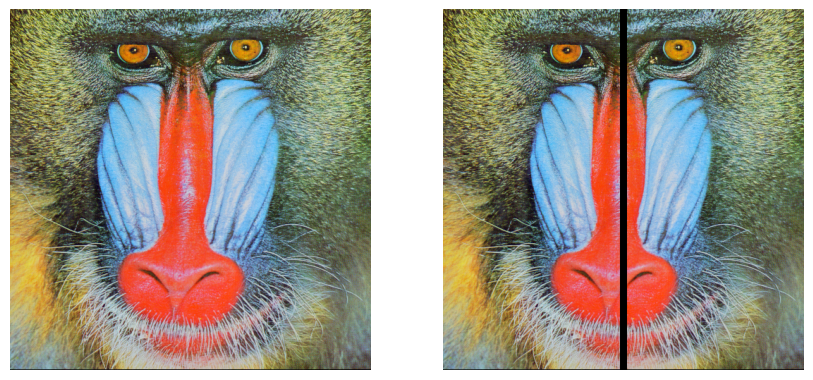

In [8]:
def q1a(img_pre):
    """
    Create a 10-pixel wide vertical black line through the middle of the image, and display the original and altered images.
    
    Args: img_pre (numpy.ndarray): The input image to be altered

    Returns: None
    """
    # create a copy of the image
    altered_img_a = img_pre.copy()
    # calculate the middle column
    middle_column = altered_img_a.shape[1] // 2
    # Set the pixels in the middle column (+-5 pixels) to black 
    # (ensure that the alpha channel is not set to zero by only changing the first 3 elements (R,G,B))
    altered_img_a[:, middle_column - 5:middle_column + 5, :3] = 0  

    # Display the original and the altered image (a) side-by-side
    display_img(img_pre, altered_img_a)

# Call the function for the 'mandrill.png' image
q1a(mandrill_img)



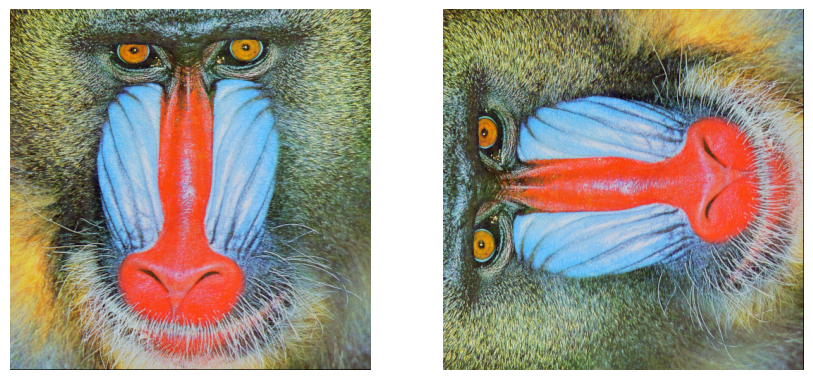

In [9]:
def q1b(img_pre):
    """
    Generate the transpose of the image, and display the original and altered images.

    Args: img_pre (numpy.ndarray): The input image to transpose

    Returns: None
    """
    # Transpose the original image
    altered_img_b = np.transpose(img_pre, (1, 0, 2))

    # Display the original and the altered image (b) side-by-side
    display_img(img_pre, altered_img_b)

# Call the function for the 'mandrill.png' image
q1b(mandrill_img)

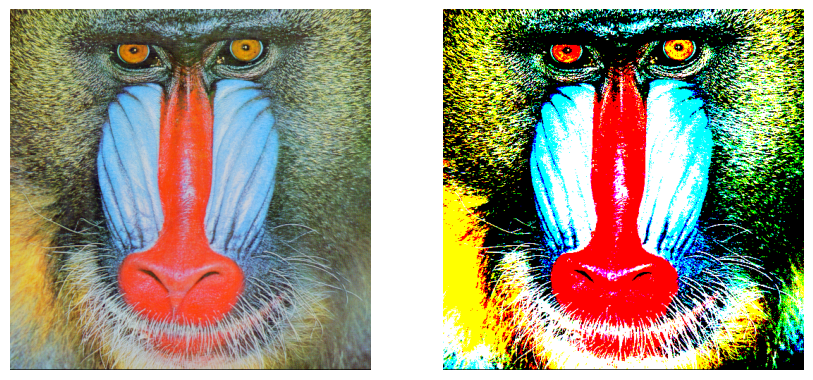

In [10]:
def q1c(img_pre):
    """
    Posterizes an input image by reducing the number of color levels in each channel to 2 for erach pixel in the image.
    
    Parameters:
        img_pre (numpy.ndarray): The input image to be posterized. Assumes the image is in the range [0, 1].

    """
    # Posterize the original image by reducing the number of color levels to 2
    # (i.e. set all pixels with values less than 0.5 to 0 and all pixels with values greater than 0.5 to 1. the astype(float) converts the boolean array to a float array)
    altered_img_c = (img_pre > 0.5).astype(float)

    # Display the original and the altered image (c) side-by-side
    display_img(img_pre, altered_img_c)

# Call the function
q1c(mandrill_img)

The images were transformed as expected in each case. 

Note: the mandrill image is in an RGBA color space, so when setting the color to black (0.0), the alpha channel must be excluded. This can be accomplished by only setting the first three elements of the array to 0.0.

---------

### Question 2

To rotate an $n$-row, $m$-column image by an angle $\theta$ in the anticlockwise direction, pixel location $[i,j]$ in the rotated image corresponds to pixel location $[x,y]$ in the original image, where

$$ x = (i-n/2)\cos(\theta)+(j-m/2)\sin(\theta)+n/2 $$

$$ y= -(i-n/2)\sin(\theta)+(j-m/2)\cos(\theta)+m/2 $$

With a few notes:

1. If $[x,y]$ falls outside the range of the original image (which happens on the edges of the rotated image), a fill color should used. Please use black for this assignment.
2. The values of $x$ and $y$ will generally be non-integer, so this rotation requires evaluation of the image data at locations that are not exactly on pixel centers in the original image. In other words, some sort of interpolation scheme is required. For this assignment, please simply round to the nearest integer. This is known as "nearest neighbor" interpolation. Bi-linear interpolation or other interpolation schemes are also sometimes used, but just take the simple nearest neighbor for this assignment.

a. Load the mandrill image and rotate it 20 degrees anticlockwise using the equations above implemented in a nested loop. Include all the calculations (even the trig functions) in the loop. Time the execution using %timeit. Plot the original and rotated images.

b. Repeat question 2a, but pull the trig functions and anything else you can pre-calculate outside the loops and rotate the original image 20 degrees clockwise.

c. Repeat question 2b, but use Just-In-Time compilation and rotate 30 degrees anticlockwise.

d. Repeat question 2a, but use PIL (Python Image Library) to perform the rotation and rotate 30 degrees clockwise.

e. Comment on the results.

[5 pts total] 

1.28 s ± 10.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


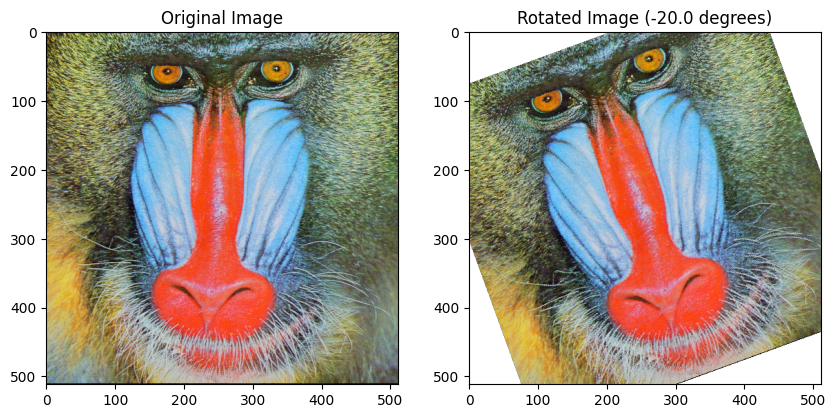

In [11]:

# Question 2a
# Load the mandrill image
mandrill_img = mpimg.imread('mandrill.png')




def rotate_image(image, angle_deg):
    """
    Rotate an image by a given angle in degrees using NumPy.
    
    Args: 
        image (numpy.ndarray): The input image to be rotated.
        angle_deg (float): The angle in degrees to rotate the image by.

    Returns: 
        rotated_img (numpy.ndarray): The input image rotated by the specified angle.
    """

    # Convert the angle from degrees to radians
    angle_rad = np.deg2rad(angle_deg)

    # Get the number of rows and columns in the image
    n_rows, m_columns, _ = image.shape

    # Create an empty array to store the rotated image
    rotated_img = np.zeros_like(image)
    
    # Pre-compute row and column adjustments
    row_adjust = n_rows / 2
    col_adjust = m_columns / 2

    # Loop over the rows and columns of the image
    for i in range(n_rows):
        for j in range(m_columns):
            # Calculate pixel adjustments for rotation
            i_adjust = i - row_adjust
            j_adjust = j - col_adjust
            
            # Calculate the new x and y coordinates using precomputed trigonometric values
            x = int(i_adjust * np.cos(angle_rad) - j_adjust * np.sin(angle_rad) + row_adjust)
            y = int(i_adjust * np.sin(angle_rad) + j_adjust * np.cos(angle_rad) + col_adjust)
            
            # Check if the new coordinates are within the bounds of the image
            if 0 <= x < n_rows and 0 <= y < m_columns:
                # if so, set the pixel to the value of the pixel at the new coordinates
                rotated_img[i, j, :] = image[x, y, :]


            

    return rotated_img



def q2a(original, rotated, rotation_degrees):
    """
    Plot the original and rotated images. 

    Args:
        original (numpy.ndarray): The original image.
        rotated (numpy.ndarray): The rotated image.
        rotation_degrees (float): The angle in degrees that the image was rotated by.

    Returns: None
    
    """
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original)
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(rotated)
    plt.title(f'Rotated Image ({rotation_degrees} degrees)')
    plt.show()

# Define the rotation angle in degrees
angle_deg = -20.0

# time the function (will print by default)
%timeit rotate_image(mandrill_img, angle_deg)

# rotate the image
rotated_img = rotate_image(mandrill_img, angle_deg)

# display the images side-by-side
q2a(mandrill_img, rotated_img, angle_deg)

371 ms ± 3.18 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


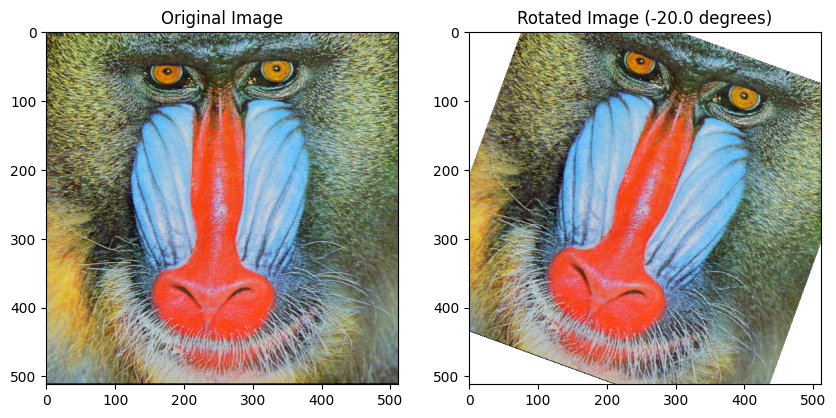

In [40]:
# Question 2b
# Load the mandrill image
mandrill_img = mpimg.imread('mandrill.png')

def rotate_image_v2(image, angle_deg):
    """ Rotate an image by a given angle in degrees using NumPy.
    
    Args: 
        image (numpy.ndarray): The input image to be rotated
        angle_deg (float): The angle in degrees to rotate the image by
    
    Returns:
        rotated_img (numpy.ndarray): The input image rotated by the specified angle
    """
    angle_rad = np.radians(angle_deg)
    
    cos_angle = np.cos(angle_rad)
    sin_angle = np.sin(angle_rad)
    
    n_rows, m_columns, _ = image.shape
    rotated_img = np.zeros_like(image)
    
    row_adjust = n_rows / 2
    col_adjust = m_columns / 2
    
    for i in range(n_rows):
        for j in range(m_columns):
            i_adjust = i - row_adjust
            j_adjust = j - col_adjust
            
            x = int(i_adjust * cos_angle + j_adjust * sin_angle + row_adjust)
            y = int(-i_adjust * sin_angle + j_adjust * cos_angle + col_adjust)
            
            if 0 <= x < n_rows and 0 <= y < m_columns:
                rotated_img[i, j, :] = image[x, y, :]

            else:
                rotated_img[i, j, :] = 0.0
    
    return rotated_img




# Define a function to generate the plots for Question 2b
def q2b(original, rotated, rotation_degrees):
    """
    Plot the original and rotated images. 
    
    Args: original (numpy.ndarray): The original image, rotated (numpy.ndarray): The rotated image, rotation_degrees (float): The angle in degrees that the image was rotated by

    Returns: None
    
    """
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original)
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(rotated)
    plt.title(f'Rotated Image ({rotation_degrees} degrees)')
    plt.show()

# Define the rotation angle in degrees (clockwise)
angle_deg = -20.0

# Rotate the image clockwise
%timeit rotated_img = rotate_image_v2(mandrill_img, angle_deg)

# Plot the images
q2b(mandrill_img, rotated_img, angle_deg)


In [17]:
from numba import jit       #this doesnt work??

@jit(nopython=True)
def rotate_nested_loops_JIT(img,angle):
    """
    docstring goes here
    """


# Question 2c
    
# time function
%timeit rotate_image_v3(mandrill_img, angle_deg)

# time function

ModuleNotFoundError: ModuleNotFoundError: No module named 'numba'

In [1]:
def rotate_image_v4(img, angle):
    """
    Rotate an image anticlockwise by a given angle in degrees using PIL.
    
    Args: 
        image (PIL.Image.Image): The input image to be rotated
        angle (float): The angle in degrees to rotate the image by
    
    Returns:
        rotated_img (PIL.Image.Image): The input image rotated by the specified angle
    """
    # convert the given numpy array img to a PIL image
    image = Image.fromarray(img)
    # Use PIL's rotate method to rotate the image
    rotated_img = image.rotate(angle)
    
    return rotated_img
        


def numpy_to_pil(np_img):
    """
    Convert a NumPy array to a PIL Image.
    
    Args:
        np_img (numpy.ndarray): The input image as a NumPy array.
    
    Returns:
        pil_img (PIL.Image.Image): The image as a PIL Image object.
    """
    
    if np_img.dtype == np.float32 or np_img.dtype == np.float64:
        np_img = (np_img * 255).astype(np.uint8)

    if np_img.shape[2] == 4:
        pil_img = Image.fromarray(np_img, 'RGBA')
    return pil_img

# Question 2d


# Define the rotation angle in degrees
angle_deg = -30.0

mandrill_PIL_img = numpy_to_pil(mandrill_img)

# time the function (will print by default)
%timeit rotate_image_v4(mandrill_PIL_img, angle_deg)

# rotate the image
rotated_img = rotate_image(mandrill_PIL_img, angle_deg)

# display the images side-by-side
q2a(mandrill_PIL_img, rotated_img, angle_deg)






def laplacian_sharpen(image, alpha):
    """
    Sharpen an image using a Laplacian filter. The filter is applied to each channel of the image separately. The alpha parameter controls the strength of the sharpening effect.

    Args:
        image (numpy.ndarray): The input image to be sharpened.
        alpha (float): The strength of the sharpening effect. Must be in the range [0, 1].

    Returns:
        sharp_image (numpy.ndarray): The sharpened image.

    
    """
    # Define the Laplacian filter 
    laplacian_filter = np.array([[0,0,0], [0,1,0], [0,0,0]]) + alpha*np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])

    # Create an array to store the sharpened image
    sharp_image = np.zeros_like(image)

    # Loop over the rows and columns of the image, applying the Laplacian filter to each pixel
    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            for k in range(image.shape[2]):
                sharp_image[i, j, k] = np.sum(image[i-1:i+2, j-1:j+2,k] * laplacian_filter)

    # Clip values to stay within the range [0, 1]
    sharp_image = np.clip(sharp_image, 0, 1)

    return sharp_image

    # Create an array to store the sharpened image
    laplacian_filter = np.array([[0,0,0], [0,1,0], [0,0,0]]) + alpha*np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])

    sharp_image = np.zeros_like(image)

    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            for k in range(image.shape[2]):
                sharp_image[i, j, k] = np.sum(image[i-1:i+2, j-1:j+2,k] * laplacian_filter)

    # Clip values to stay within the range [0, 1]
    sharp_image = np.clip(sharp_image, 0, 1)

    return sharp_image

# Load the image
eye_img = mpimg.imread('eye.png')

# Apply Laplacian sharpening filter
sharpened_image = laplacian_sharpen(eye_img, alpha = 0.3)
sharpened_image2 = laplacian_sharpen(eye_img, alpha = 3)

# Plotting the original and sharpened images
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.imshow(eye_img)
plt.title('Original Image')

plt.subplot(132)
plt.imshow(sharpened_image)
plt.title('Sharpened Image with alpha = 0.3')

plt.subplot(133)
plt.imshow(sharpened_image2)
plt.title('Sharpened Image with alpha = 3.0')

plt.show()


NameError: name 'mandrill_img' is not defined

Comments on Q2 go here

-------

### Question 3

Image arrays can be usefully filtered by 2D centered FIR filters:

$$ y'_{i,j}=\sum_{m=-m_1}^{m_1}\sum_{n=-n_1}^{n_1}a_{m,n}y_{i,j}$$

These filters can perform many different functions including blurring, sharpening and edge detection. The coefficient array $a_{m,n}$ is known as the filter "kernel", and has size $2m_1+1$ by $2n_1+1$. Filter kernels are usually square, with $m_1=n_1$. This filtering operation is known as 2D convolution.

Edge detection is usually accomplished by smoothing (to remove image noise) and then applying a derivative operator. Further nonlinear operations can be used to refine the edges by suppressing weak edges, joining strong edges, etc. A commonly-used derivative kernel is the Sobel operator. For the horizontal (x) derivative, the Sobel operator is:

$$ S_x= \left[ \begin{array}{ccc}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1 \end{array} \right]  $$

and the vertical derivative uses the transpose $S_y=S_x^T$. These are simple extensions of the 1D 3-point stencil derivative operator from last week. The gradient magnitude of array $A$ is then $G=\sqrt{(S_x * A)^2+(S_y * A)^2}$ where the $*$ symbol denotes 2D convolution and the square root is taken on each element of the array individually.

Another commonly used filter kernel is the Laplacian ($\nabla^2$) kernel

$$ L = \left[ \begin{array}{ccc}
0 & -1 & 0 \\
-1 & 4 & -1 \\
0 & -1 & 0 \end{array} \right]  $$

which detects second derivatives. This is sometimes used in image sharpening filters, which take the form

$$ K = \left[ \begin{array}{ccc}
0 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 0 \end{array} \right] +\alpha L$$

where the degree of sharpening can be controlled by $\alpha$.

Start by writing a general function to apply an arbitrary filter (2D convolution) of the type described above, and then answer the following questions. Your function may discard the edge points where the filter cannot be applied ($m_1$ points from each of the 2 edges in the first dimension and $n_1$ from the 2 edges in the second dimension).

a. Load the mandrill image again, and perform a "boxcar smoothing" with a 15x15 kernel of the form $a_{m,n}=1/15^2$. Display the original and smoothed images.

b. Load the "peppers.png" image and apply a 5x5 boxcar smoothing. Find the gradient magnitude $G$ using the Sobel operator on each channel (R,G,B) and sum them to get an overall gradient. Apply a threshold of 30% of the maximum gradient to discard weak edges (that is, if the gradient is less than 30% of the max, set the RGB values to 0,0,0 and otherwise set R,G,B=1,1,1). Plot the original image and the processed edges.

c. Load the "eye.png" image and apply a Laplacian sharpening filter with kernel $K$ as given above and $\alpha=0.3$ (moderate sharpening) and then with $\alpha=3.0$ (extreme sharpening). This filter may cause some of the RGB values to go outside their nominal [0,1] range; they should be clipped to constrain the range. Plot the original image and the sharpened image for both values of $\alpha$.

d. Comment on the results.

[10 pts total]

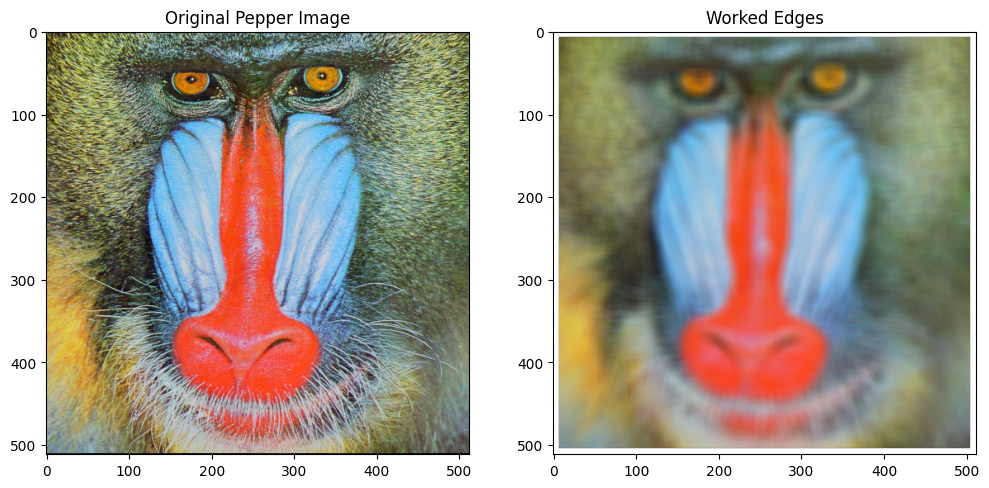

In [5]:
# Question 3a                           # Note: This one takes a while to finish running
# Load the image
img = plt.imread('mandrill.png')


def convolve_2d(img, kernel):
    """
    Apply a 2D convolution filter to an image. 

    Args: 
        img (numpy.ndarray): The input image to be convolved.
        kernel (numpy.ndarray): The convolution kernel to be applied to the image.

    Returns:
        convolved_img (numpy.ndarray): The convolved image.
    """
    m1, n1 = kernel.shape
    m, n, _ = img.shape
    smoothed_img = np.zeros_like(img)
    
    m_half, n_half = m1 // 2, n1 // 2
    
    for i in range(m_half, m - m_half):
        for j in range(n_half, n - n_half):
            for c in range(img.shape[2]):  # Iterate over color channels (e.g., R, G, B)
                smoothed_img[i, j, c] = np.sum(img[i-m_half:i+m_half+1, j-n_half:j+n_half+1, c] * kernel)
    
    return smoothed_img


def plot_images(original, smoothed):
    """
    Plot the original and smoothed images.
    
    Args:
        original (numpy.ndarray): The original image, smoothed (numpy.ndarray): The smoothed image
        smoothed (numpy.ndarray): The smoothed image
    
    Returns:
        None
    """
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(original)
    plt.title('Original Pepper Image')

    plt.subplot(1, 2, 2)
    plt.imshow(smoothed)
    plt.title('Worked Edges')
    plt.show()

# Define the boxcar smoothing kernel
boxcar_kernel = np.ones((15, 15)) / 225.0  # 15x15 kernel with all values as 1/225

# Apply boxcar smoothing to the mandrill image
smoothed_mandrill = convolve_2d(mandrill_img, boxcar_kernel)

# Plot the images
plot_images(mandrill_img, smoothed_mandrill)











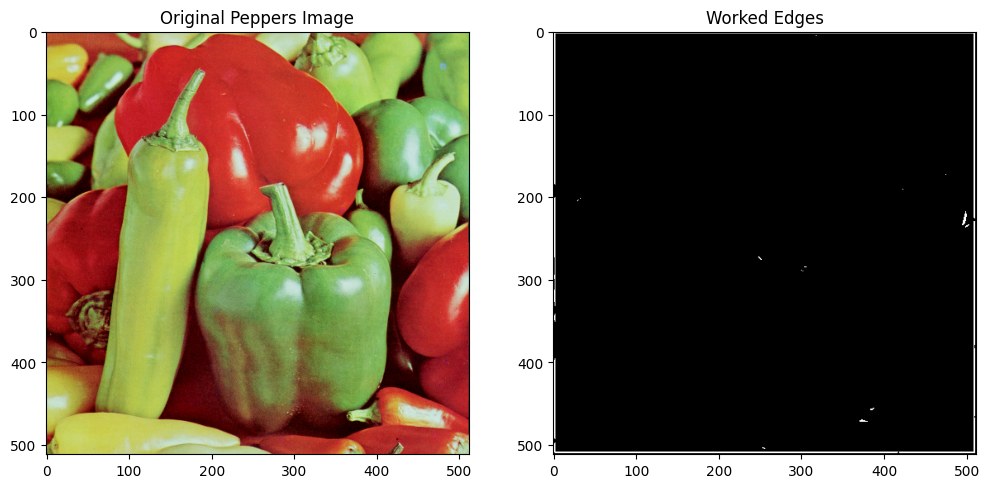

In [14]:
# Q3b

"""Load the "peppers.png" image and apply a 5x5 boxcar smoothing. Find the gradient magnitude 𝐺
using the Sobel operator on each channel (R,G,B) and sum them to get an overall gradient. Apply a
threshold of 30% of the maximum gradient to discard weak edges (that is, if the gradient is less than 30%
of the max, set the RGB values to 0,0,0 and otherwise set R,G,B= (1,1,1). Plot the original image and the
processed edges"""

# Q3b

# Load the image
peppers_img = plt.imread('peppers.png')
# Remove the alpha channel
peppers_img = peppers_img[:, :, :3]





def plot_images(original, smoothed):
    """Plot the original and smoothed images."""
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(original)
    plt.title('Original Peppers Image')

    plt.subplot(1, 2, 2)
    plt.imshow(smoothed)
    plt.title('Worked Edges')
    plt.show()


boxcar_kernel = np.ones((5, 5)) / 25.0  # 5x5 kernel with all values as 1/25
smoothed_peppers = convolve_2d(peppers_img, boxcar_kernel) # Smooths the image using a 5x5 boxcar

# Separate RGB channels
red_channel = smoothed_peppers[:, :, 0]
green_channel = smoothed_peppers[:, :, 1]
blue_channel = smoothed_peppers[:, :, 2]

# Calculate the gradients for each channel
red_gradient = grad(red_channel)
green_gradient = grad(green_channel)
blue_gradient = grad(blue_channel)

# Calculate the total gradient and apply threshold condition
worked_edges = threshold(red_gradient + blue_gradient + green_gradient)

final_output = np.zeros_like(peppers_img)

# where worked_edges == 1, set the corresponding pixel in the original image to 1, otherwise set it to 0
final_output[worked_edges == 1] = [1, 1, 1]
final_output[worked_edges != 1] = [0, 0, 0]

#Plot original and new images
plot_images(peppers_img, final_output)



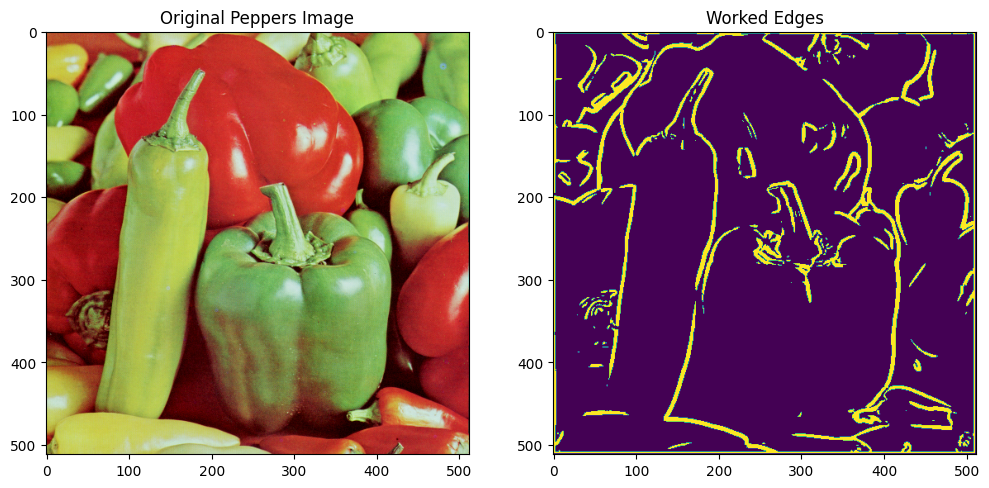

In [37]:
# Q3c
def grad(channel):
    """
    Calculate the gradient magnitude of an image channel using the Sobel operator.

    Args: 
        channel (numpy.ndarray): The input image channel to calculate the gradient magnitude of.

    Returns:
        gradient (numpy.ndarray): The gradient magnitude of the input image channel.

    """

    # Define the Sobel kernels
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.transpose(sobel_x)

    # Create arrays to store the gradients in the x and y directions
    grad_x = np.zeros_like(channel)
    grad_y = np.zeros_like(channel)
    
    for i in range(1, channel.shape[0] - 1):
        for j in range(1, channel.shape[1] - 1):
            grad_x[i, j] = np.sum(channel[i-1:i+2, j-1:j+2] * sobel_x)
            grad_y[i, j] = np.sum(channel[i-1:i+2, j-1:j+2] * sobel_y)
    
    gradient = np.sqrt(grad_x**2 + grad_y**2)
    # normalize
    gradient /= np.max(gradient)

    

    return gradient


def threshold(gradient):
    """
    Apply a threshold condition to an image gradient. The threshold is set to 30% of the maximum gradient.

    Args:
        gradient (numpy.ndarray): The input image gradient to apply the threshold condition to.

    Returns:
        edges (numpy.ndarray): The thresholded image gradient.
    """
    edges = np.zeros_like(gradient)
    for i in range(len(gradient)):
        for j in range(len(gradient[0])):
            if gradient[i][j] >= 0.3*np.max(gradient):
                edges[i][j] = 1.0
    return edges

# Modify the threshold function to adapt the threshold value based on the mean of the gradient
def adaptive_threshold(gradient):
    threshold_value = 0.3
    edges = (gradient >= threshold_value).astype(np.float32)
    return edges


# Load the image
peppers_img = plt.imread('peppers.png')
# Remove the alpha channel
peppers_img = peppers_img[:, :, :3]

# Apply boxcar smoothing only to RGB channels
boxcar_kernel = np.ones((5, 5)) / 25.0  
smoothed_peppers = convolve_2d(peppers_img, boxcar_kernel)

# Separate RGB channels
red_channel = smoothed_peppers[:, :, 0]
green_channel = smoothed_peppers[:, :, 1]
blue_channel = smoothed_peppers[:, :, 2]


# Calculate the gradients for each channel
red_gradient = grad(red_channel)
green_gradient = grad(green_channel)
blue_gradient = grad(blue_channel)

# Calculate the total gradient
total_gradient = (red_gradient + blue_gradient + green_gradient) 

# Apply threshold condition and normalize
worked_edges = adaptive_threshold(total_gradient)




plot_images(peppers_img, worked_edges)




Max Gradient: 1.0


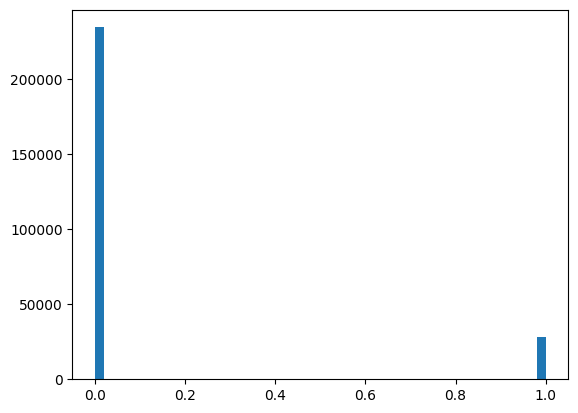

[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 1. 1. 0.]
 [0. 1. 1. ... 1. 1. 0.]
 ...
 [0. 1. 1. ... 1. 1. 0.]
 [0. 1. 1. ... 1. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [36]:
print("Max Gradient:", np.max(worked_edges))
plt.hist(worked_edges.flatten(), bins=50)
plt.show()

print(worked_edges)

### Conclusions

Remember to write an introduction [2 pts] and conclusion [2 pts].

**Image sources:**

Mandrill.png and peppers.png are standard test images from the USC Signal and Image Processing Institute available at  https://sipi.usc.edu/database/database.php?volume=misc .

eyes.png is from the Wikipedia page for unsharp masking and is available at https://commons.wikimedia.org/wiki/File:Unsharped_eye.jpg. Image author is Ru_dragon, and the image is distributed under the GNU Free Documentation License.


In [ ]:

def rgb_channels(value):
    '''
    Obtain the rgb channels for red (value = 0), green (value = 1), and blue (value = 2). Then it takes the 
    gradient of each channel using the helper function 'grad()'.

    Args:
        value (int): The value of the rgb channel to be obtained.

    Returns:
        grad(smoothed_peppers[:, :, value]): The gradient of the specified channel.

    '''
    return grad(smoothed_peppers[:, :, value])